In [12]:
import numpy as np
import matplotlib.pyplot as plt
from MFVI import MFVI_with_subsampling_naive, MFVI_with_subsampling_jointCV

## Logistic regression on Sonar

In [5]:
# Naive estimator
runner = MFVI_with_subsampling_naive(
    model_dir='./models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, losses, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

In [6]:
# JointCV estimator
runner = MFVI_with_subsampling_jointCV(
    model_dir='./models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, lossesJCV, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

(225.0, 400.0)

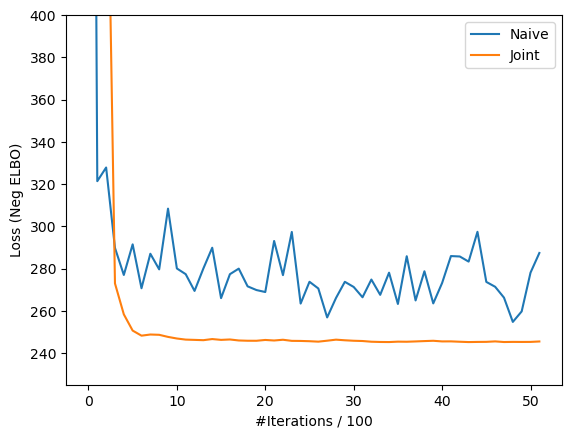

In [7]:
plt.plot(losses, label='Naive')
plt.plot(lossesJCV, label='Joint')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
plt.ylim(top=400, bottom=225)

## MovieLens (subset)

In [8]:
# Have a peek of the data
data_tiny = np.load('./models/MovieLens/tiny.npz')
print("Tiny subset size:", data_tiny['X'].shape)

data_full = np.load('./models/MovieLens/full.npz')
print("Full dataset size:", data_full['X'].shape)

Tiny subset size: (500, 18)
Full dataset size: (100000, 18)


In [9]:
# Naive estimator
runner = MFVI_with_subsampling_naive(
    model_dir='./models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, losses, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

In [10]:
# Naive estimator
runner = MFVI_with_subsampling_jointCV(
    model_dir='./models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, lossesJCV, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

(1280.0, 1400.0)

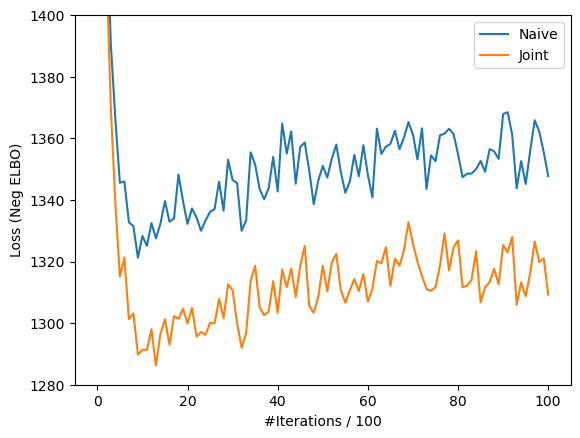

In [13]:
plt.plot(losses, label='Naive')
plt.plot(lossesJCV, label='Joint')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
plt.ylim(top=1400, bottom=1280)